# Houce Prices Dynamics in King County WA

## Import Necessary Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import geopandas as gpd

## Data Pre-Processing

**Source:** Kaggle <br> **Link:** https://www.kaggle.com/datasets/shivachandel/kc-house-data/data <br>**Variables:** 21 (id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15) <br> **Observations:** 21.613 <br> **Period:** 02 May 2014 to 27 May 2015 <br> **Geographic coverage:** King County, including Seattle

In [2]:
# Read the dataset
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

# Get information about the DataFrame, such as column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  


The dataset consists of 21,613 observations (rows) and 21 variables (columns).
The variables include information such as id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, and sqft_lot15.

The id variable appears to be a unique identifier for each observation. All variables structured as numeric/integer except the date variable which is currently stored as a character type. It might be useful to convert it to a date type for time-related analyses. So we will first convert the date variable from character to a date type.

It's important to note that while all variables may be structured as numeric, certain variables, despite their numeric representation, hold categorical significance. These categorical variables are essentially numerically coded to represent different categories or levels within the dataset. This nuance is crucial to consider when interpreting and analyzing the data.


In [4]:
# Convert the 'date' variable to datetime type
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Calculate summary statistics for numerical columns
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


**id**
   - The `id` variable represents a unique identifier for each home sold.

**date**
   - The `date` variable, contains information about the date of the house sale and spans from May 2, 2014, to May 27, 2015.

**price:**
   - The `price` variable is the **dependent variable**   and shows a wide range, with the minimum house price at $75,000 and the maximum at $7,700,000.
   - The median house price is $450,000, and the mean is $540,088.

**bedrooms and bathrooms:**
   - The variables related to the number of bedrooms and bathrooms  (0.5 accounts for a room with a toilet but no shower) exhibit varying ranges and distributions.
   - The number of bedrooms ranges from 0 to 33, with a mean of approximately 3.37.
   - The number of bathrooms ranges from 0 to 8, with a mean of approximately 2.12.

**sqft_living and sqft_lot:**
   - These variables represent the size of houses.
   - `sqft_living` reflects the Square footage of the apartments interior living area, ranging from 290 to 13,540 square feet, with a mean of 2080.
   - `sqft_lot` represents the lot size, ranging from 520 to 1,651,359 square feet, with a mean of 15,107.

**floors**
 -The `floors` variable is represents the levels of the houses. The majority of houses have 1 or 1.5 floors.
   - Notably, there seems to be a common occurrence of houses with 1.5 floors, while the mean is approximately 1.494.
   - This suggests that many houses have a split-level design or additional space on an upper level, contributing to the fractional floor values.

**waterfront:**  
   - The `waterfront` variable is a dummy variable mostly 0 , represents the property has no waterfront view and 1 for with waterfront.

**view and condition:**  
   - `view` represents the overall view rating (0 to 4)  with a mean of 0.23 
   -`condition` represents the overall condition rating (0 to 5) with a mean of 3.41 for `condition`.

**grade:**
   - `grade` represents the overall grade given to the housing unit and ranges from 1 to 13 where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
   
**sqft_above, and sqft_basement:**
   - `sqft_above` and `sqft_basement` show the square footage above ground and is below ground level¶ (in the basement), respectively.

**yr_built, yr_renovated:**
   - Houses were built between 1900 and 2015 (`yr_built`), with the majority built in the mid to late 20th century.
   - `yr_renovated` indicates the last renovation year, with a mean of 84.4 and many zero values, suggesting no renovations.


**Geographical Information (lat, long, zipcode):**
   - `lat` and `long` provide latitude and longitude information of house locations, respectively.
   - `zipcode` represents the zip code of the house location.
   

**sqft_living15 and sqft_lot15:**
   - `sqft_living15` and `sqft_lot15` indicate the living room and lot size in 2015, reflecting potential renovations or changes. (? some sources mention it differently and main source couldnt find !!!)


These summary statistics provide an overview of the distribution and characteristics of each numeric variable in the dataset, with a specific focus on understanding the relationships with the **dependent variable, 'price.'**

### Missing Values

 - Most variables in the dataset have complete data; however, it's worth noting that `sqft_above` has two missing values (NA's).
   - Given the small number of missing values (only two observations) in relation to the overall dataset size, we have decided to remove these specific observations. This decision is based on considering the number of observations and the minimal impact on the overall analysis.
   - Removing these observations ensures that the dataset remains largely complete and is a reasonable approach in this context.

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum() 

# Filter missing values greater than zero
missing_values_positive = missing_values[missing_values > 0]

# Display the number of  missing values for variable that have missing values
print("#Missing values:")
print(missing_values_positive)

#Missing values:
sqft_above    2
dtype: int64


In [7]:
# Remove observations with missing values in the 'sqft_above' variable
house_data = df.dropna(subset=['sqft_above'])



### Checking Dublicates

The dataset analysis provided two distinct findings regarding duplicates. First, a comprehensive scan across all columns of the dataset did not reveal any duplicate entries, suggesting the entire dataset is unique in its entirety. However, when focusing specifically on the 'id' column—a unique identifier for each home sold—it was discovered that 177 homes were listed with duplicate 'id' values. This suggests that while the dataset itself is unique, there were instances where individual homes appeared to have been sold more than once during the observed period. Such duplicates in the 'id' column indicate potential anomalies in the data, suggesting that certain homes may have been recorded multiple times or sold more than once, warranting a closer examination into the sales records to ensure data accuracy and integrity.


In [8]:

# Check for duplicates in the entire dataset
duplicates_full = house_data[house_data.duplicated()]
print("Duplicate entries in the entire dataset:")
print(duplicates_full)

# Check for duplicates based on the 'id' column
duplicates_id = house_data[house_data.duplicated(subset=['id'])]
print("\nDuplicate entries based on 'id' column:")
print(duplicates_id)



Duplicate entries in the entire dataset:
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

Duplicate entries based on 'id' column:
               id       date      price  bedrooms  bathrooms  sqft_living  \
94     6021501535 2014-12-23   700000.0         3       1.50         1580   
314    4139480200 2014-12-09  1400000.0         4       3.25         4290   
325    7520000520 2015-03-11   240500.0         2       1.00         1240   
346    3969300030 2014-12-29   239900.0         4       1.00         1000   
372    2231500030 2015-03-24   530000.0         4       2.25         2180   
...           ...        ...        ...       ...        ...          ...   
20181  7853400250 2015-02-19   645000.0         4       3.50         2910   
20613  2724049222 2014-12-01   220000.0 


To handle it 3 approaches :

**Remove Duplicates:** You can choose to remove the rows with duplicate 'id' values. This ensures that each home is represented only once in the dataset. However, you need to carefully consider the implications of removing data, as it may result in a loss of information.

**Aggregate Data:** If the duplicates in the 'id' column represent different transactions or sales for the same home, you might want to aggregate the data. For example, you could calculate the average price, total number of bedrooms, or other relevant statistics for each unique 'id'.

**Feature Engineering:** Instead of directly removing or aggregating duplicates, you can create new features to capture the information. For example, you might create a new binary feature indicating whether a home has been sold more than once.

We choosed the remove dublicates.

In [9]:
# Remove rows with duplicate 'id' values
house_data_unique = house_data.drop_duplicates(subset=['id'])


In [10]:
##last check for manipulated data 

house_data_unique.head()

house_data_unique.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.143400e+04,21434,2.143400e+04,21434.000000,21434.000000,21434.000000,2.143400e+04,21434.000000,21434.000000,21434.000000,...,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000
mean,4.580791e+09,2014-10-28 05:22:08.543435520,5.405262e+05,3.371559,2.117384,2082.658533,1.513639e+04,1.496221,0.007605,0.235140,...,7.661752,1790.966129,291.692405,1971.101288,84.737706,98077.864421,47.560150,-122.213694,1988.321685,12786.537324
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123787e+09,2014-07-21 00:00:00,3.220500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,2014-10-15 00:00:00,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000
75%,7.308825e+09,2015-02-13 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.069675e+04,2.000000,0.000000,0.000000,...,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.750000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876616e+09,NaN,3.677053e+05,0.929235,0.769906,919.128047,4.154048e+04,0.540403,0.086875,0.767125,...,1.174300,829.064010,442.693660,29.384208,402.448955,53.469399,0.138606,0.140899,685.724544,27376.670626


### Correlation Analyze

Initially, we constructed a correlation matrix to discern relationships among variables in the dataset. To enhance interpretability, we applied a filter, selecting correlations with an absolute value greater than 0.5. This focused approach facilitates easier interpretation by highlighting strong correlated variables. 
The choice of the cutoff level for correlation analysis depends on the specific goals of the analysis and the nature of the data. Commonly used cutoff values for correlation coefficients between 0.5-0.7 for moderate correlation and above 0.7 for strong correlation. Eventhough we in the begging chooses 0.7 cutoff , the results showed that The price variable stands out with a strong positive correlation of 0.70 with only the square footage of living space (sqft_living). While this suggests a notable linear relationship between these two factors,we recognized it may be beneficial to also consider variables with moderate correlations to price, as they could provide additional insights into determinants of house prices beyond just living space. So we decreased the cutoff level according that.


According to final results (with 0.5 cutoff):

The Price (dependent variable): Strongly correlated with the square footage of living space (sqft_living)  at 0.70, indicating that larger living spaces tend to command higher prices. And also having moderate correlation with other features such as bathrooms (0.53), sqft_above(0.61), sqft_living15(0.59) and grade(0.67)

The number of bathroom (bathrooms) have strong correlation with only sqft_living(0.75), also having moderate correlation with multiple variables ; price(0.53), bedrooms(0.52), floors (0.5), sqft_above(0.69),sqft_living15 (0.57), grade (0.66),sqft_living15 (0.51)

The square footage of living space (sqft_living) demonstrates strong positive correlations with price (0.70), bathrooms (0.75), sqft_above (0.88), sqft_living15 (0.76), and grade (0.76), highlighting its multifaceted influence on house features and value. and it have moderate correlation with  bedroom (0.58) 

The square footage above ground (sqft_above) has the highest correlation with sqft_living (0.88) and substantial correlations with sqft_living15 (0.73) and grade (0.76), And it have moderate correlation with price (0.61), bathroom (0.69) and floors (0.52) underscoring its significance in determining overall property grades.


The overall grade (grade) exhibits a strong positive correlation with various measures of house size, including sqft_living (0.76), sqft_above (0.76), and sqft_living15 (0.71). Additionally, it shows a moderate correlation with price (0.67) and bathrooms (0.66), suggesting that houses with higher grades tend to be larger, have more bathrooms, and command higher prices.


In conclusion, the correlation analysis has uncovered intricate relationships among various features in the dataset, emphasizing the strong correlation of house prices with the square footage of living space (sqft_living). Additionally, moderate correlations with other features such as bathrooms (0.53), sqft_above (0.61), sqft_living15 (0.59), and grade (0.67) suggest the presence of diverse factors influencing property values, warranting further in-depth analysis in later stages.

Moreover, the identified potential multicollinearity issue highlights the need for careful feature selection to enhance the stability and interpretability of the regression model. Specifically, considering the strong correlations among Sqft_living, Sqft_living15, and Sqft_above, it is advisable to include only one of them in the model to avoid multicollinearity and ensure the model's robustness.

In addition it's crucial to remember that correlation does not imply causation. While these variables are correlated, further analysis and domain knowledge are needed to understand the causal relationships and make informed predictions.

As we move forward, advanced visualizations will serve as valuable tools to unravel these complex relationships, offering a more nuanced understanding of the dynamics shaping the real estate market in King County, Washington State, USA.

Feature Selection: Given the multicollinearity observed among sqft_living, sqft_living15, and sqft_above, we are considering to select one of these variables that best represents the living space in the model. For our case, sqft_living has a strong correlation with the target variable price and other predictors, making it a suitable choice.


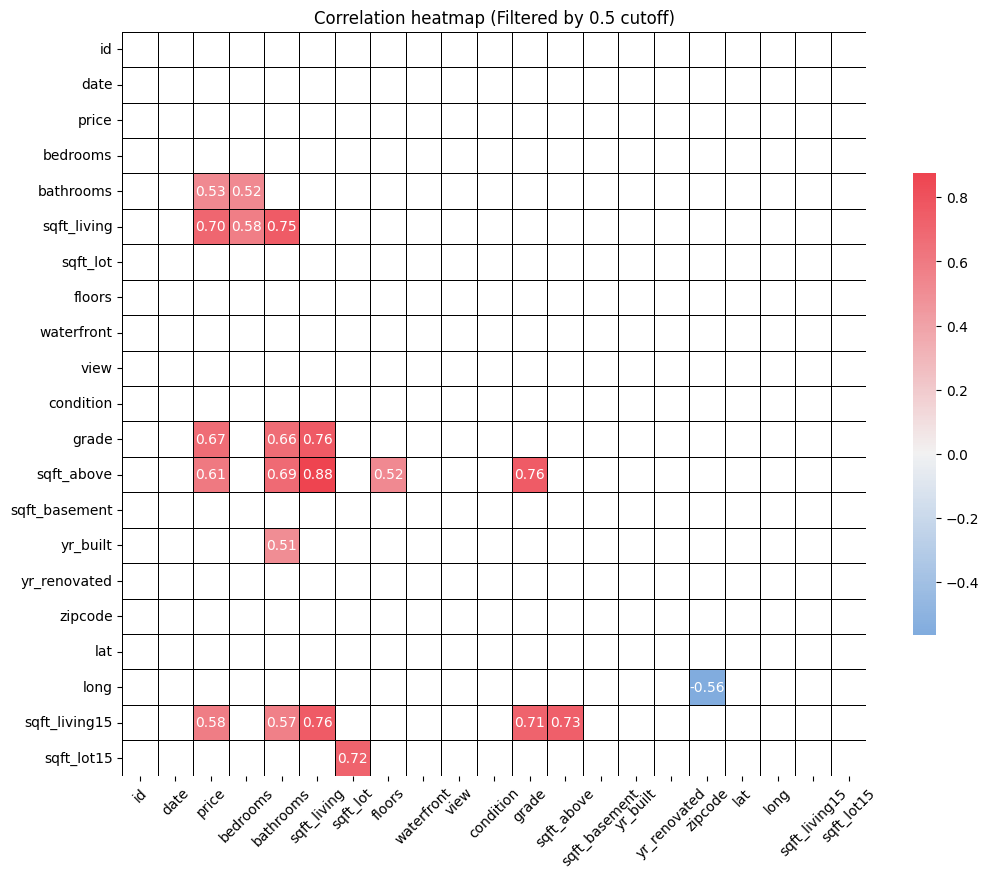

In [11]:
# Calculate correlation for all variables
cor_matrix = house_data_unique.corr()

# Filter the correlation matrix by cutoff value
cutoff = 0.5
cor_matrix_filtered = cor_matrix[(cor_matrix.abs() >= cutoff) & (cor_matrix != 1)]

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.triu(np.ones_like(cor_matrix_filtered, dtype=bool))

# Plot heatmap with the mask
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True) # generate colors for the heatmap
sns.heatmap(cor_matrix_filtered, mask=mask, center=0, annot=True, fmt=".2f", 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap, linecolor='black')
plt.xticks(rotation=45)
plt.title(f"Correlation heatmap (Filtered by {cutoff} cutoff)")
plt.show()


### Data Exploration

In organizing our variables by type, we enhance the precision of our analysis and visualization methods. This thoughtful categorization enables us to apply tailored techniques to each variable type, ensuring more insightful and nuanced exploration of the dataset.

In [12]:
#Define variables according to their types

# All variables
all_vars = ["id", "bathrooms", "bedrooms", "condition", "date", "floors", "grade", "lat", "long", "price", "sqft_above", "sqft_basement", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15", "view", "waterfront", "yr_built", "yr_renovated", "zipcode"]

# Continuous Numeric Variables
cont_vars = ["price", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15", "sqft_above", "sqft_basement"]

# Discrete Numeric Variables
disc_vars = ["bedrooms", "floors", "bathrooms"]

# Categorical Variables
cat_vars = ["waterfront", "view", "condition", "grade"]

# Date Variables
date_vars = ["date", "yr_built", "yr_renovated"]

# Geographical Variables
geo_vars = ["lat", "long", "zipcode"]




## Exploratory Data Analysis (EDA)

In this script, we import necessary data handling and visualization libraries such as pandas, numpy, matplotlib, and seaborn. The script changes the default number formatting setting in pandas to prevent scientific notation and increase precision. It proceeds to perform a correlation analysis on a given dataframe, 'df', and outputs a correlation matrix. It also visualizes this matrix using a heat map for better readability and interpretation. 

### Distribution of Continuous Numeric Variables

The script initially sets up a grid layout for multiple subplots, which would include histograms, density plots for each numerical attribute.

A histogram gives an overview of the distribution of the numerical attribute, the density plot superimposed on the histogram shows the empirical density of the distribution, 

On visual inspection, the right-skewed/year non-normal distributions of these variables may suggest the presence of outliers caused by luxurious or unique properties. Instead of removing or transforming these outliers, we propose the use of robust statistical methods for further analysis, which are designed for handling outliers effectively. This allows for a more reliable analysis, acknowledging the presence of these high-end properties without them disproportionately impacting the results.

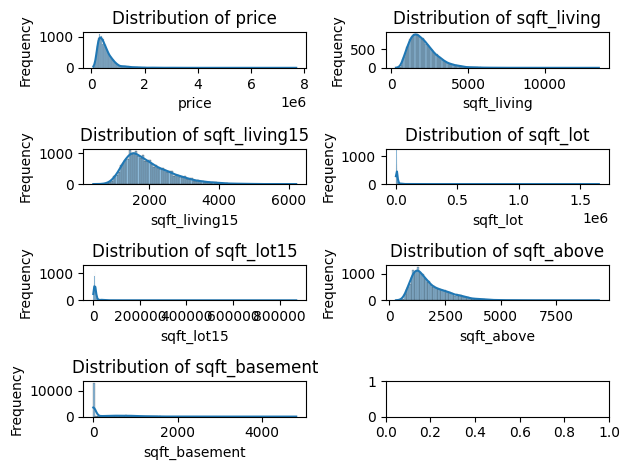

In [13]:
# Continuous Numeric Variables
fig, axes = plt.subplots(4, 2)

for i, var in enumerate(cont_vars):
    sns.histplot(data=house_data_unique, x=var, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {var}')
    axes[i // 2, i % 2].set_xlabel(var)
    axes[i // 2, i % 2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### Distribution of Discrete Numeric Variables

Bedrooms :

The distribution of bedrooms in the dataset reveals a clear preference for houses with 3 bedrooms, constituting nearly half of the entries (45.4%). 4-bedroom homes follow closely with 31.9%, and 2 and 5-bedroom configurations are also prevalent, making up 12.8% and 7.4%. However, 0-bedroom and 1-bedroom houses have notably lower percentages with approximately 0.1% and 0.9%, respectively. The distribution is positively skewed, with a peak around 3 bedrooms.

Bathrooms Configuration:

The dataset showcases a diverse distribution of bathrooms. Houses with 2.5 bathrooms are most common, representing 24.9%. Additionally, 1 bathroom and 1.75 bathrooms are prevalent at 17.8% and 14.1%, respectively. The distribution exhibits multiple peaks, suggesting a variety of bathroom count configurations in the dataset.

In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". (wikipedia)

Floor Counts:

When considering the number of floors, Houses with 1 floor are predominant, making up 49.3% of the dataset. 2 floors houses follow closely at 38.3%, with 1.5 floors representing 8.8%. The distribution is skewed towards fewer floors, with a sharp decline for houses with more than 2 floors.

Note on 0 Values:

In the context of houses requiring bedrooms and bathrooms, the presence of 0 values in these categories may indicate missing or incomplete data. It's uncommon for a house to have zero bedrooms or bathrooms. Investigating and addressing the reasons behind these zero values is crucial for ensuring the quality and accuracy of the dataset, as well as the reliability of any analyses conducted.



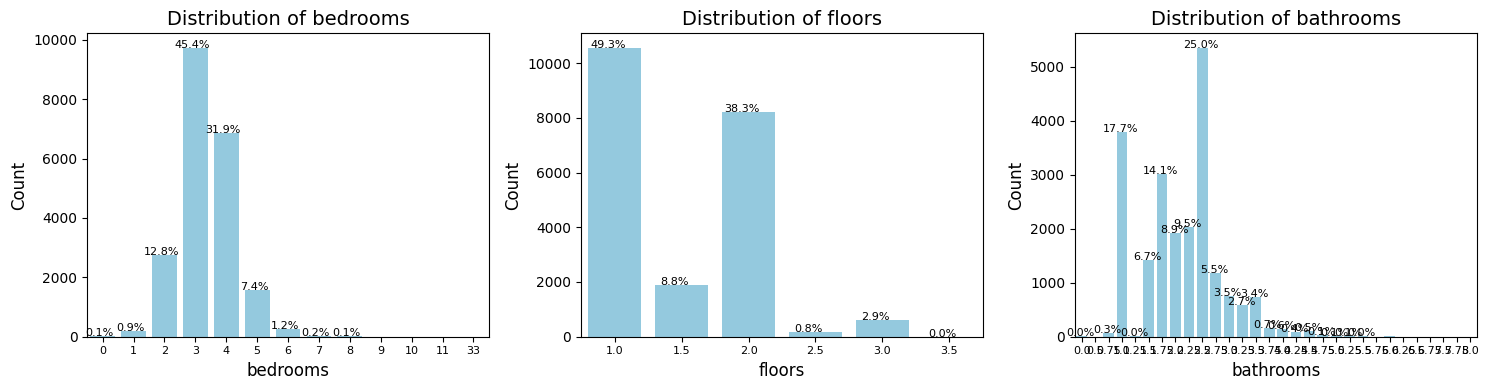

In [14]:
# Discrete Numeric Variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # Adjusted figsize for better visualization

for i, var in enumerate(disc_vars):
    sns.countplot(data=house_data_unique, x=var, ax=axes[i], color='skyblue')  # Using countplot for separated bar graph
    axes[i].set_title(f'Distribution of {var}', fontsize=14)  # Increased title font size

    # Calculate percentage distribution
    total = len(house_data_unique[var])
    for p in axes[i].patches:
        percentage = 100 * p.get_height() / total
        if percentage < 0.03:  # Filter out percentages below 0.03% to make it readable
            continue
        label = '{:.1f}%'.format(percentage)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        axes[i].annotate(label, (x, y), size=8, ha='center')

    axes[i].set_xlabel(var, fontsize=12)  # Increased x-axis label font size
    axes[i].set_ylabel('Count', fontsize=12)  # Increased y-axis label font size

    # Decrease x-axis label font size
    axes[i].tick_params(axis='x', labelsize=8)  

# Adjust layout
plt.tight_layout()
plt.show()


#### Handling Zero Values in Bedroom & Bathroom 


In [15]:
# Create a copy of the DataFrame
house_data2 = house_data_unique.copy()

def impute_nonzero(var):
    '''
    A function to impute missing values using the median of non-zero values
    '''
    var_copy = var.copy()  # Create a copy of the column to avoid SettingWithCopyWarning
    non_zero_values = var_copy[var_copy != 0]
    if non_zero_values.size > 0:
        imputed_value = non_zero_values.median()
        var_copy[var_copy == 0] = imputed_value
    return var_copy

# Apply the imputation function to bedrooms and bathrooms
house_data2['bedrooms'] = impute_nonzero(house_data_unique['bedrooms'])
house_data2['bathrooms'] = impute_nonzero(house_data_unique['bathrooms'])


### Distribution of Categorical  Variables

Out of all observations, only 0.8 percent of houses are located on the waterfront.

Additionally, the majority of houses (90.1%) have a view score of 0. Among the remaining view scores, 4.5% have a score of 2, while scores of 1 and 4 each account for 1.5%. The remaining 2.4% of houses have a view score of 3. we observed that the 'view' variable predominantly contained 0 values, suggesting that many houses had not been viewed. In response, we decided to engineer a new feature named 'viewed' to capture this information more explicitly. The 'viewed' variable takes on a value of 1 if the house has been viewed and 0 otherwise.

The majority of houses in the dataset are in good to average condition. Approximately 64.9% of houses fall within Condition 3, indicating that a significant portion of the properties is well-maintained.Condition 4 homes represent 26.3%, suggesting a sizable proportion of houses are in better-than-average condition. Meanwhile, Condition 5 homes, which likely denote excellent condition, constitute 7.9% of the dataset.

The distribution of grades reflects a diverse range of housing quality. A significant portion of houses falls within Grade 7 (41.5%) and Grade 8 (28.2%), indicating properties with a higher level of construction and design. Grades 9 and 10 together contribute 17.5%, highlighting a considerable proportion of houses with superior construction and design quality.The dataset includes a limited number of houses with lower grades (1-6), with most grades in this range having negligible representation (close to 0%).The distribution is skewed towards higher grades, emphasizing the prevalence of houses with above-average construction and design quality in the dataset.


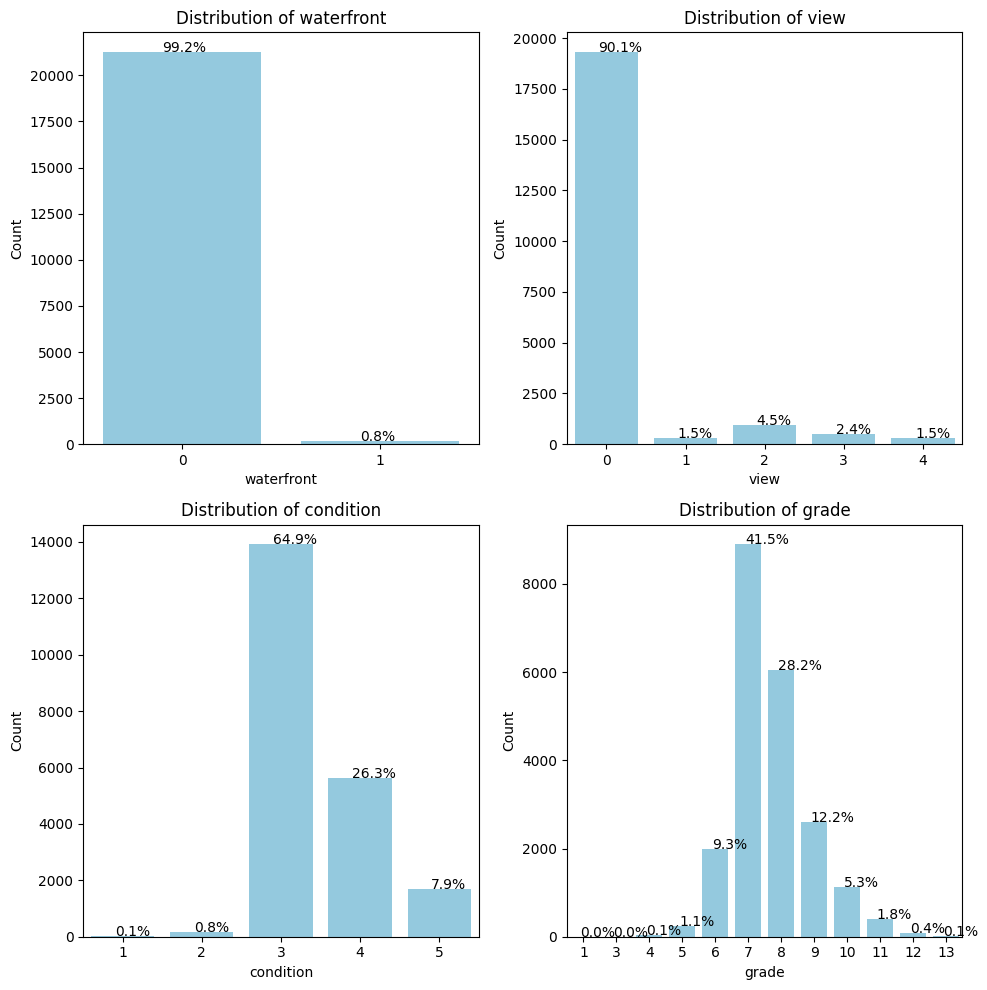

In [16]:
# Initialize a subplot grid
n = len(cat_vars)
ncols = 2
nrows = n // ncols if n % ncols == 0 else n // ncols + 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10), dpi=100)

for i, cat in enumerate(cat_vars):
    # Convert categorical variables to factors
    house_data_copy = house_data_unique.copy()
    house_data_copy[cat] = house_data_copy[cat].astype('category')

    # Create bar plots for categorical variables using Seaborn
    ax = axes[i // ncols, i % ncols]
    sns.countplot(x=cat, data=house_data_copy, ax=ax, color='skyblue')

    # Add percentage labels on top of each bar
    total = len(house_data_copy[cat])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=10)

    ax.set_title(f"Distribution of {cat}")
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xlabel(f'{cat}', fontsize=10)

# remove empty subplots
if n % ncols != 0:
    for idx in range(n, nrows * ncols):
        fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()


#### Create a new variable 'viewed'

We create a new binary variable called 'viewed' based on the 'view' variable, where a value of 1 signifies that the property has view, and 0 indicates otherwise. Following this, the original 'view' variable is dropped from the DataFrame to avoid redundancy. Finally, a list named cat_vars2 is defined, containing the names of categorical variables in the modified DataFrame, which now includes "waterfront", "viewed", "condition", and "grade". This process streamlines the dataset by condensing information and prepares it for further analysis or modeling.

In [17]:
# Create a copy of the DataFrame
house_data2 = house_data2.copy()

# Create a new variable 'viewed' with value 1 if 'view' is not 0, and 0 otherwise
house_data2['viewed'] = np.where(house_data2['view'] != 0, 1, 0)

# Drop the original 'view' variable
house_data2.drop(columns=['view'], inplace=True)

# Categorical Variables
cat_vars2 = ["waterfront", "viewed", "condition", "grade"]


## Advanced Visualization Techniques


#### Continuous variables vs. "Price"

The scatter plots collectively underscore similarities in the distribution patterns of all continuous variables concerning price. This graphical exploration enhances the understanding of the correlation between each continuous variable and housing prices, with the filter for prices drawing attention to three potential outliers. Identifying and comprehending such outliers is crucial for robust data analysis, aiding in informed decisions regarding their impact on statistical models and subsequent analyses. Further investigation and domain knowledge are typically required to interpret these outliers within the dataset's context.

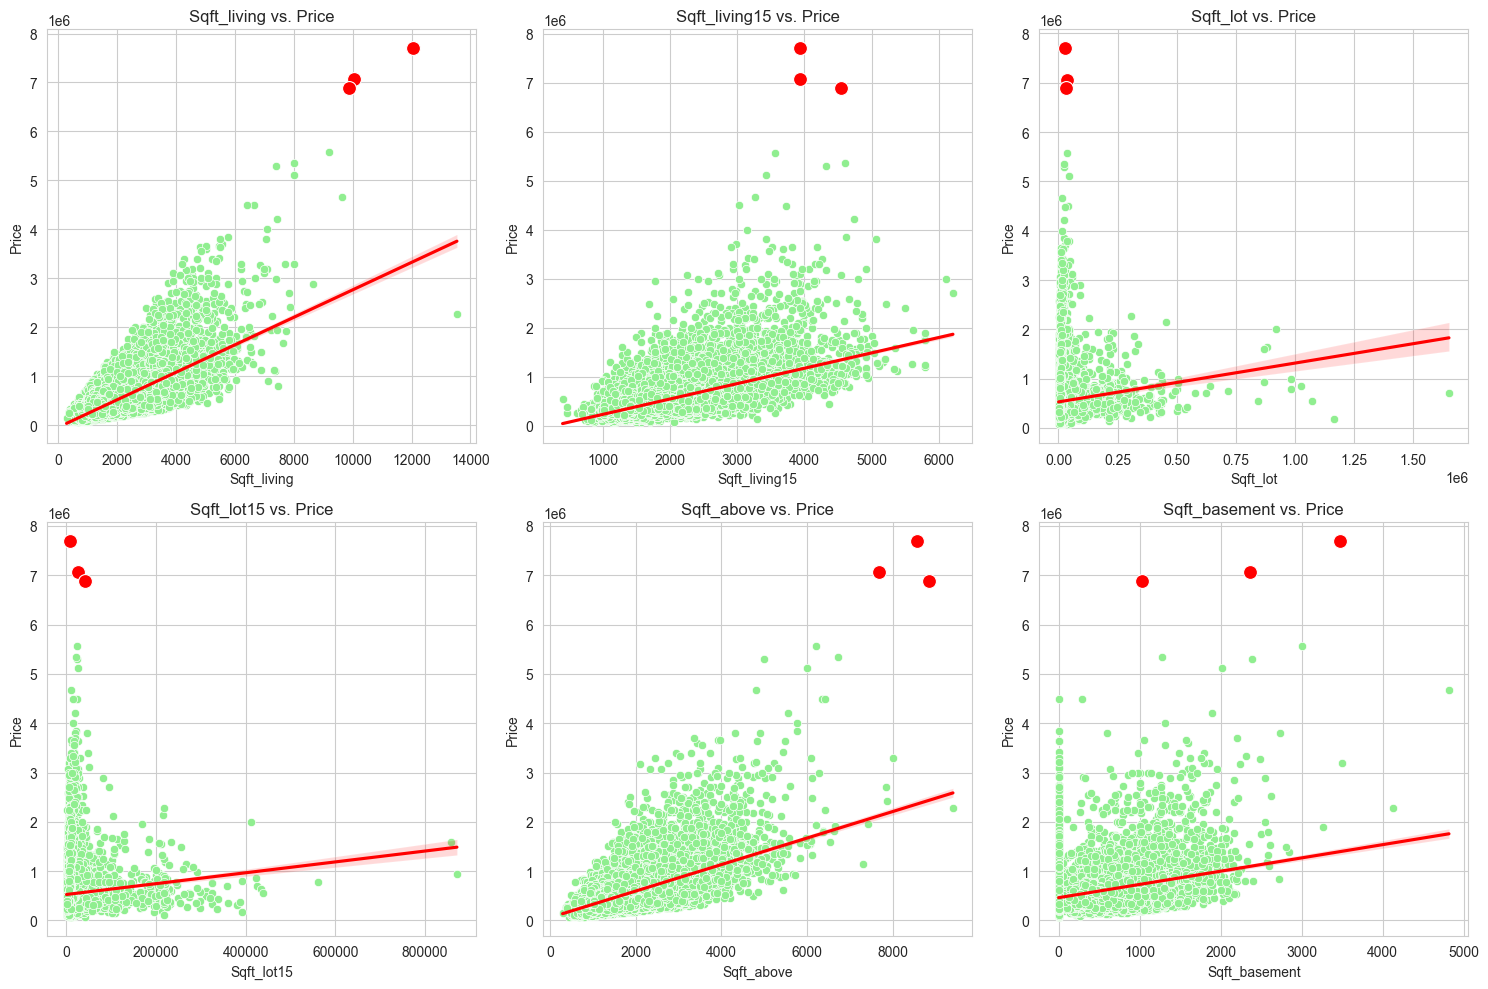

In [18]:
# Set the style
sns.set_style("whitegrid")

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

exception_var = "price"

# Counter for the index of axes array
plot_index = 0

for var in cont_vars:
    if var != exception_var:
        # Scatter plot
        sns.scatterplot(x=var, y='price', data=house_data2, color='lightgreen', ax=axes[plot_index])
        
        # Add regression line
        sns.regplot(x=var, y='price', data=house_data2, scatter=False, color='red', ax=axes[plot_index])
        
        # Highlight observations where housing prices exceed $6,000,000 with a red circle
        outliers = house_data2[house_data2['price'] > 6000000]
        sns.scatterplot(x=outliers[var], y=outliers['price'], color='red', marker='o', s=100, ax=axes[plot_index])
        
        # Set plot title and labels
        axes[plot_index].set_title(f'{var.capitalize()} vs. Price')
        axes[plot_index].set_xlabel(var.capitalize())
        axes[plot_index].set_ylabel('Price')
        
        # Increment plot index
        plot_index += 1

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


#### Discreate variables vs “Price”


In this visualization, we continued our exploration of the dataset by examining the relationship between housing prices and discrete variables. We introduced noise for a more nuanced view and identified high-priced outliers, visualizing them with encircling shapes. As an additional step, we focused on the unusual case where the number of bedrooms equals 33. We specifically circled these observations using a distinctive green color. This targeted analysis aims to spotlight and investigate unique patterns and outliers within the data, enhancing our understanding of their impact on housing prices. Our approach reflects an iterative process, adapting visualizations to reveal hidden insights in the dataset.


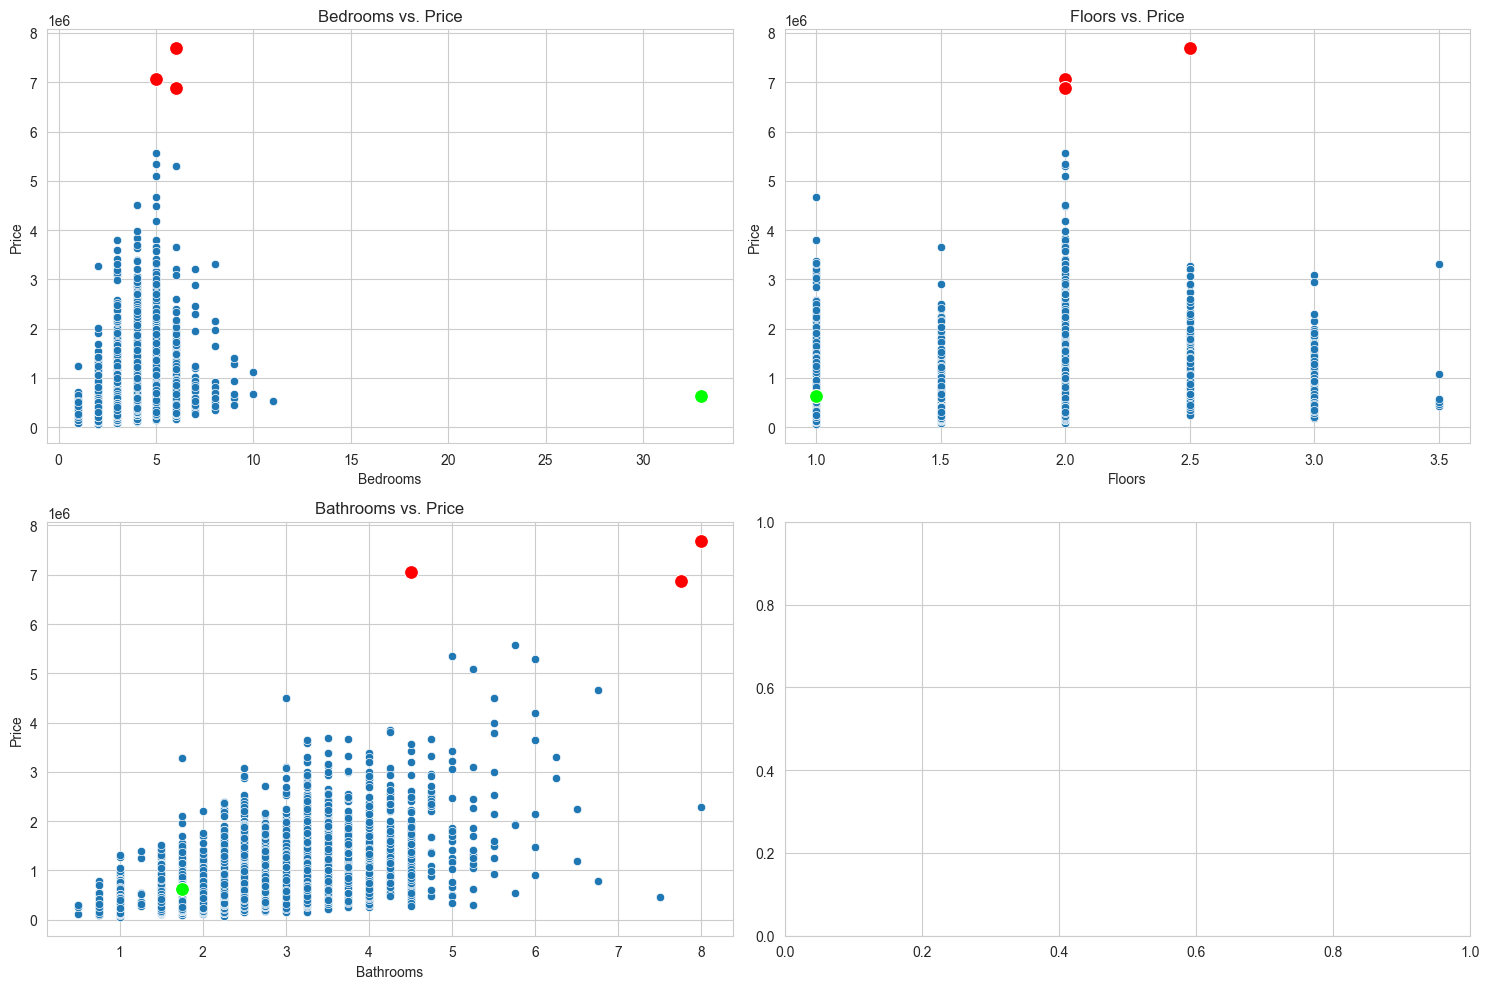

In [19]:
# Set the style
sns.set_style("whitegrid")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Add noise for a more nuanced view
house_data_with_noise = house_data2.copy()
house_data_with_noise['price'] += np.random.normal(scale=10000, size=house_data_with_noise.shape[0])

# Visualize the relationship between housing prices and discrete variables
for i, var in enumerate(disc_vars):
    # Scatter plot
    sns.scatterplot(x=var, y='price', data=house_data_with_noise, ax=axes[i])
    
    # Highlight high-priced outliers with encircling shapes
    high_priced_outliers = house_data_with_noise[house_data_with_noise['price'] > 6000000]
    sns.scatterplot(x=var, y='price', data=high_priced_outliers, color='red', marker='o', s=100, ax=axes[i])
    
    # Circle observations where the number of bedrooms equals 33 with distinctive green color
    unusual_cases =house_data_with_noise[house_data_with_noise['bedrooms'] == 33]
    sns.scatterplot(x=var, y='price', data=unusual_cases, color='lime', marker='o', s=100, ax=axes[i])
    
    # Set plot title and labels
    axes[i].set_title(f'{var.capitalize()} vs. Price')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



##### Handling Observation where bedrom=33 
 Here, we first find the indices where the 'bedrooms' value is 33 in the DataFrame. Then, we print  the details for that observation. Given that this observation has 33 bedrooms however has  only 1 floor, with a small sized  it appears to be an outlier or an error in the data. To handle this, we decided replace the 'bedrooms' value of 33 with the 3  bedrooms in the dataset.

In [20]:
# Find indices where 'bedrooms' is 33
indices_bedrooms_33 = house_data2[house_data2['bedrooms'] == 33].index

# Print details of observations with 'bedrooms' value of 33
for idx in indices_bedrooms_33:
    print(f"Observation at index {idx}:")
    print(house_data2.loc[idx])  # Print details of the observation
    print("\n")  # Add a newline for better readability




Observation at index 15870:
id                        2402100895
date             2014-06-25 00:00:00
price                       640000.0
bedrooms                          33
bathrooms                       1.75
sqft_living                     1620
sqft_lot                        6000
floors                           1.0
waterfront                         0
condition                          5
grade                              7
sqft_above                    1040.0
sqft_basement                    580
yr_built                        1947
yr_renovated                       0
zipcode                        98103
lat                          47.6878
long                        -122.331
sqft_living15                   1330
sqft_lot15                      4700
viewed                             0
Name: 15870, dtype: object




In [21]:
# Replace the 'bedrooms' value of 33 with the median value of bedrooms
house_data2.loc[indices_bedrooms_33, 'bedrooms'] = 3

#### Categorical variables vs. “Price”

This graphical exploration enhances the understanding of the correlation between each categorical variable and housing prices, with the filter for prices drawing attention to potential outliers.

The blue circles indicate houses with the lowest grades (grade < 3), which are not waterfront, have zero views, and are in poor condition (condition 1).

The green-circled houses with 33 bedrooms present intriguing attributes, notably lacking waterfront features, having zero views, a condition rating of 5, and a grade higher than 5. While such characteristics are conceivable, the observed data challenges expectations, particularly in terms of the square footage of living space. The discrepancy between the expected and actual living space raises questions about potential anomalies or recording errors.

To refine the accuracy and reliability of the analysis, reassessing or potentially excluding these variables is advisable. Upon detailed examination, anomalies in houses with 33 bedrooms, such as a single floor, less than 2000 sqft_living, and around 2 bathrooms, were identified as potential errors. To rectify this issue, the number of bedrooms was replaced with the median value, resulting in a more reasonable representation aligned with domain knowledge and realistic expectations.

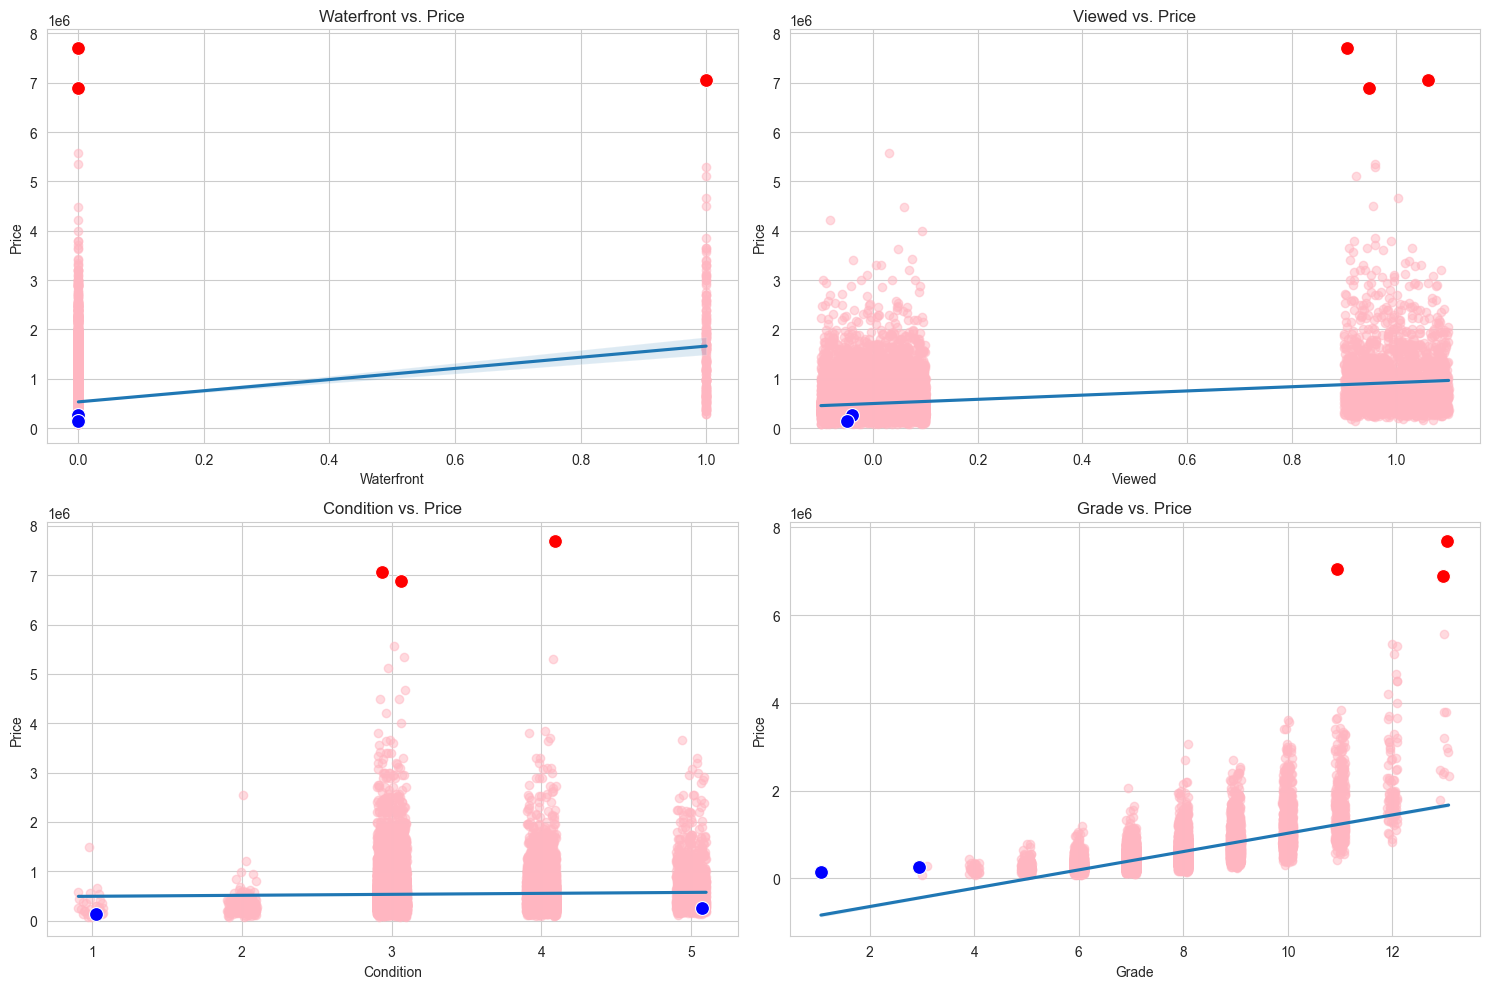

In [22]:
# Set the style
sns.set_style("whitegrid")

# Add jitter for better density visualization
jitter_amount = 0.1

# Create a copy of the DataFrame for modification
house_data_modified = house_data2.copy()

# Add jitter to the categorical variables
for var in cat_vars2:
    if var != "waterfront":
        house_data_modified[var] += np.random.uniform(-jitter_amount, jitter_amount, len(house_data_modified))

# Circle observations where the price exceeds $6,000,000 with red circles
high_priced_outliers = house_data_modified[house_data_modified['price'] > 6000000]

# Circle houses with the lowest grades (grade < 3) with blue circles
lowest_grade_houses = house_data_modified[house_data_modified['grade'] < 3]


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Visualize the relationship between categorical variables and housing prices
for i, var in enumerate(cat_vars2):
    # Scatter plot with regression line
    sns.regplot(x=var, y='price', data=house_data_modified, scatter_kws={'color': 'lightpink', 'alpha': 0.5}, ax=axes[i])
    
    # Highlight high-priced outliers with red circles
    sns.scatterplot(x=var, y='price', data=high_priced_outliers, color='red', marker='o', s=100, ax=axes[i])
    
    # Highlight houses with the lowest grades with blue circles
    sns.scatterplot(x=var, y='price', data=lowest_grade_houses, color='blue', marker='o', s=100, ax=axes[i])
    

    # Set plot title and labels
    axes[i].set_title(f'{var.capitalize()} vs. Price')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


## Machine Learning Modeling for Price Prediction

Before delving into machine learning modeling, we first conduct preprocessing on our latest manipulated dataset to ensure it's ready for further analysis. For this purpose we first checked the details of "house_data2."

In [23]:
##last check on manipulated dataset before move for ML
house_data2.info()
house_data2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 21434 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21434 non-null  int64         
 1   date           21434 non-null  datetime64[ns]
 2   price          21434 non-null  float64       
 3   bedrooms       21434 non-null  int64         
 4   bathrooms      21434 non-null  float64       
 5   sqft_living    21434 non-null  int64         
 6   sqft_lot       21434 non-null  int64         
 7   floors         21434 non-null  float64       
 8   waterfront     21434 non-null  int64         
 9   condition      21434 non-null  int64         
 10  grade          21434 non-null  int64         
 11  sqft_above     21434 non-null  float64       
 12  sqft_basement  21434 non-null  int64         
 13  yr_built       21434 non-null  int64         
 14  yr_renovated   21434 non-null  int64         
 15  zipcode        21434 non

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,viewed
count,2.143400e+04,21434,2.143400e+04,21434.000000,21434.000000,21434.000000,2.143400e+04,21434.000000,21434.000000,21434.000000,...,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000
mean,4.580791e+09,2014-10-28 05:22:08.543435520,5.405262e+05,3.371979,2.118433,2082.658533,1.513639e+04,1.496221,0.007605,3.410376,...,1790.966129,291.692405,1971.101288,84.737706,98077.864421,47.560150,-122.213694,1988.321685,12786.537324,0.098722
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123787e+09,2014-07-21 00:00:00,3.220500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904921e+09,2014-10-15 00:00:00,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000,0.000000
75%,7.308825e+09,2015-02-13 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.069675e+04,2.000000,0.000000,4.000000,...,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.750000,0.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000
std,2.876616e+09,NaN,3.677053e+05,0.903169,0.768551,919.128047,4.154048e+04,0.540403,0.086875,0.650247,...,829.064010,442.693660,29.384208,402.448955,53.469399,0.138606,0.140899,685.724544,27376.670626,0.298295


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

### Preprocessing for ML models


#### Selecting Features
In the preprocessing step for ML prediction, we begin by removing unnecessary features from our dataset. We first drop the features that are not relevant or useful for our modeling purposes. In this case, we're dropping features like "id", "date", "lat", "long", and "zipcode" from our dataset.  While acknowledging the potential significance of spatial correlation and temporal analysis, we consciously choose to set aside these considerations for the current project. However, we note that exploring these aspects could be advantageous for future projects, providing avenues for deeper investigation and potentially enriching our predictive models. 

In [25]:
# Drop specified features from the dataset
house_data2_selected = house_data2.drop(columns=["id", "date", "lat", "long", "zipcode"])

# Verify the preprocessed dataset
print(house_data2_selected.info())


<class 'pandas.core.frame.DataFrame'>
Index: 21434 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21434 non-null  float64
 1   bedrooms       21434 non-null  int64  
 2   bathrooms      21434 non-null  float64
 3   sqft_living    21434 non-null  int64  
 4   sqft_lot       21434 non-null  int64  
 5   floors         21434 non-null  float64
 6   waterfront     21434 non-null  int64  
 7   condition      21434 non-null  int64  
 8   grade          21434 non-null  int64  
 9   sqft_above     21434 non-null  float64
 10  sqft_basement  21434 non-null  int64  
 11  yr_built       21434 non-null  int64  
 12  yr_renovated   21434 non-null  int64  
 13  sqft_living15  21434 non-null  int64  
 14  sqft_lot15     21434 non-null  int64  
 15  viewed         21434 non-null  int32  
dtypes: float64(4), int32(1), int64(11)
memory usage: 3.2 MB
None


#### Scaling Dataset

we performed robust scaling on the selected continuous numeric variables (cont_vars) of the house_data2 dataset using the RobustScaler from scikit-learn. Robust scaling is advantageous when dealing with numerical data containing outliers, as it scales the data based on the interquartile range (IQR), making it robust to the presence of outliers. By applying robust scaling, we aim to ensure that each feature contributes equally to the analysis without being overly influenced by extreme values. This preprocessing step is crucial for improving the performance and stability of machine learning models, particularly those sensitive to the scale of features, such as linear models and neural networks. The resulting house_data2_scaled dataset contains the scaled values of the continuous numeric variables, ready for further analysis and modeling.

In [26]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Perform robust scaling on selected columns
house_data2_scaled = house_data2_selected.copy()
house_data2_scaled[cont_vars] = scaler.fit_transform(house_data2_selected[cont_vars])

# Display the scaled dataset
print(house_data2_scaled.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 -0.706301         3       1.00    -0.660714 -0.347196     1.0           0   
1  0.272488         3       2.25     0.580357 -0.065762     2.0           0   
2 -0.836043         2       1.00    -1.026786  0.421797     1.0           0   
3  0.476854         4       3.00     0.035714 -0.462103     1.0           0   
4  0.185787         3       2.00    -0.214286  0.082379     1.0           0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7   -0.372549       0.000000      1955             0   
1          3      7    0.598039       0.714286      1951          1991   
2          3      6   -0.774510       0.000000      1933             0   
3          5      7   -0.500000       1.625000      1965             0   
4          3      8    0.117647       0.000000      1987             0   

   sqft_living15  sqft_lot15  viewed  
0      -0.568182   -0.394968       0  
1 

#### Split dataset 

After pre-processing the data, we split it into training and testing sets. This step is crucial for evaluating the performance of our machine learning models.

In [27]:
# Step 1: Split the dataset into features (X) and the target variable (y)
X = house_data2_scaled.drop(columns=['price'])  # Features
y = house_data2_scaled['price']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Building the Models

Finally, we define the model formulas for our machine learning models. These formulas specify the relationship between the predictors (features) and the target variable (price).

We decided to utilize tree-based models for our analysis. While we aimed to incorporate all variables in our first model (model1), we also wanted to explore the insights gleaned from correlation analysis. Hence, we opted to create two distinct models for comparison.

*model1:* Includes all predictors except for the variables that were dropped during pre-processing.
*model2:* Includes only the variables that were selected based on correlation analysis.

These model formulas will be used in subsequent steps for model training and evaluation.

In [28]:
## Define features for each model
# Model 1: All features
X_model1_train = X_train.copy()
X_model1_test = X_test.copy()

# Model 2: Selected features only
selected_features = ["bathrooms", "bedrooms", "grade", "sqft_above", "sqft_basement", "sqft_living", "sqft_living15", "viewed"]
X_model2_train = X_train[selected_features].copy()
X_model2_test = X_test[selected_features].copy()

In [29]:
# Display the shapes of the datasets
print("X_model1_train shape:", X_model1_train.shape)
print("X_model1_test shape:", X_model1_test.shape)
print("X_model2_train shape:", X_model2_train.shape)
print("X_model2_test shape:", X_model2_test.shape)

X_model1_train shape: (15003, 15)
X_model1_test shape: (6431, 15)
X_model2_train shape: (15003, 8)
X_model2_test shape: (6431, 8)


### Modeling

#### Regression Trees

Regression trees offer a powerful framework for predicting house prices, allowing us to uncover intricate patterns in the data. By following a systematic approach and leveraging the capabilities of regression trees, we can build robust predictive models that drive informed decision-making in the real estate industry.

we trained two DecisionTreeRegressor models:
Model 1 was trained using all available variables in the dataset, while Model 2 was trained using a subset of selected variables. We evaluated the performance of both models by calculating the Root Mean Squared Error (RMSE) on a held-out test set. By setting the random_state parameter to a fixed value (random_state=42), we ensured reproducibility of results across different runs.

To promote reproducibility in our analysis, we followed best practices such as setting random seeds *(random_state=42)* and documenting our methodology clearly.By sharing our code and methodology, other researchers can replicate our experiments and build upon our findings, contributing to the collective advancement of knowledge in the field.

In [30]:

# Initialize DecisionTreeRegressor for Model 1 (All Variables)
tree_model_1 = DecisionTreeRegressor(random_state=123)

# Train the models
tree_model_1.fit(X_model1_train, y_train)

# Make predictions  
y_pred_1 = tree_model_1.predict(X_model1_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_1 = mean_squared_error(y_test, y_pred_1, squared=False)

print("RMSE for Model 1 (All Variables):", rmse_1)

# Initialize DecisionTreeRegressor for Model 2 (Selected Variables)
tree_model_2 = DecisionTreeRegressor(random_state=123)
# Train the models
tree_model_2.fit(X_model2_train, y_train)
# Make predictions  
y_pred_2 = tree_model_2.predict(X_model2_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_2 = mean_squared_error(y_test, y_pred_2, squared=False)

print("RMSE for Model 2 (Selected Variables):", rmse_2)


C:\Users\CASPER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE for Model 1 (All Variables): 0.7867811468506424
RMSE for Model 2 (Selected Variables): 0.9522426618375509


C:\Users\CASPER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


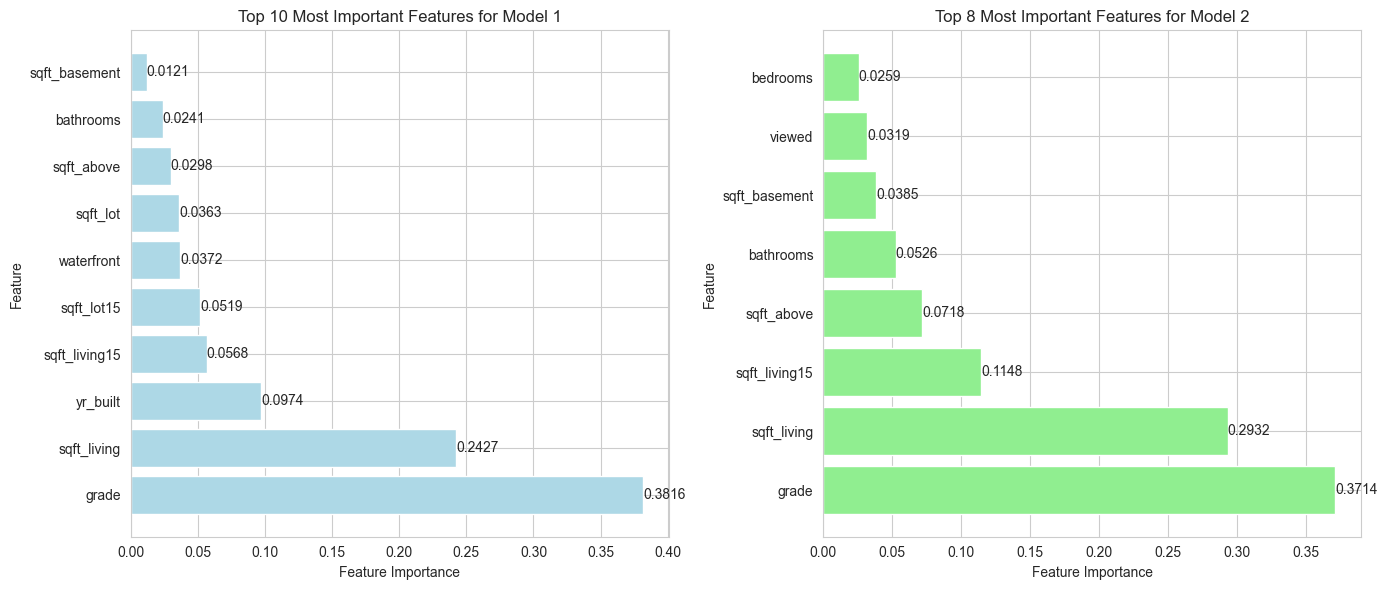

In [35]:
# Get feature importances for Model 1
feature_importances_1 = tree_model_1.feature_importances_

# Sort features based on their importances for Model 1
sorted_indices_1 = np.argsort(feature_importances_1)[::-1]
sorted_features_1 = X_model1_train.columns[sorted_indices_1]
sorted_importances_1 = feature_importances_1[sorted_indices_1]

# Plot the top N most important features for Model 1
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # Subplot for Model 1
top_n = 10  # Adjust the number of features to display
bars_1 = plt.barh(range(top_n), sorted_importances_1[:top_n], align='center', color='lightblue')  # Set color to light blue
plt.yticks(range(top_n), sorted_features_1[:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features for Model 1'.format(top_n))

# Add annotations to the bars for Model 1
for bar, importance in zip(bars_1, sorted_importances_1[:top_n]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.4f}'.format(importance), 
             va='center', ha='left')

# Get feature importances for Model 2
feature_importances_2 = tree_model_2.feature_importances_

# Sort features based on their importances for Model 2
sorted_indices_2 = np.argsort(feature_importances_2)[::-1]
sorted_features_2 = X_model2_train.columns[sorted_indices_2]
sorted_importances_2 = feature_importances_2[sorted_indices_2]

# Plot the top N most important features for Model 2
plt.subplot(1, 2, 2)  # Subplot for Model 2
top_n_2 = min(10, len(sorted_importances_2))  # Adjust the number of features to display
bars_2 = plt.barh(range(top_n_2), sorted_importances_2[:top_n_2], align='center', color='lightgreen')  # Set color to light green
plt.yticks(range(top_n_2), sorted_features_2[:top_n_2])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features for Model 2'.format(top_n_2))

# Add annotations to the bars for Model 2
for bar, importance in zip(bars_2, sorted_importances_2[:top_n_2]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.4f}'.format(importance), 
             va='center', ha='left')

plt.tight_layout()
plt.show()


Fit Regression Tree Model on Model 1

In [36]:
# Set seed for reproducibility
np.random.seed(123)

# Cross-validation to find optimal tree size
# Perform cross-validation to find optimal tree size
cv_scores = []
for size in range(2, 20):
    reg_tree_cv = DecisionTreeRegressor(max_depth=size, random_state=123)
    scores = cross_val_score(reg_tree_cv, X_model1_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append((-1) * scores.mean())

best_tree_size = np.argmin(cv_scores) + 2  # Adding 2 because range started from 2

# Fit regression tree model with optimal tree size
reg_tree_optimal = DecisionTreeRegressor(max_depth=best_tree_size, random_state=123)
reg_tree_optimal.fit(X_model1_train, y_train)

# Print best tree size
print("Best Tree Size:", best_tree_size)


Best Tree Size: 8


In [37]:

# Perform cross-validation to find optimal tree size for model2
cv_scores2 = []
for size in range(2, 20):
    reg_tree2_cv = DecisionTreeRegressor(max_depth=size, random_state=123)
    scores = cross_val_score(reg_tree2_cv, X_model2_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores2.append((-1) * scores.mean())

best_tree_size2 = np.argmin(cv_scores2) + 2  # Adding 2 because range started from 2

# Fit regression tree model with optimal tree size for model2
reg_tree2_optimal = DecisionTreeRegressor(max_depth=best_tree_size2, random_state=123)
reg_tree2_optimal.fit(X_model2_train, y_train)

# Print best tree size for model2
print("Best Tree Size for Model 2:", best_tree_size2)


Best Tree Size for Model 2: 6


In [47]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for Model 1
param_grid_1 = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Model 1
grid_search_1 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),
                             param_grid=param_grid_1,
                             scoring='neg_mean_squared_error',
                             cv=8,
                             n_jobs=-1)

# Perform grid search for Model 1
grid_search_1.fit(X_model1_train, y_train)

# Get the best hyperparameters for Model 1
best_params_1 = grid_search_1.best_params_
print("Best Hyperparameters for Model 1:", best_params_1)

# Initialize DecisionTreeRegressor with the best hyperparameters for Model 1
best_tree_model_1 = DecisionTreeRegressor(random_state=123, **best_params_1)

# Train the model with the best hyperparameters
best_tree_model_1.fit(X_model1_train, y_train)

# Repeat the same process for Model 2
param_grid_2 = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_2 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),
                             param_grid=param_grid_2,
                             scoring='neg_mean_squared_error',
                             cv=6,
                             n_jobs=-1)

grid_search_2.fit(X_model2_train, y_train)

best_params_2 = grid_search_2.best_params_
print("Best Hyperparameters for Model 2:", best_params_2)

best_tree_model_2 = DecisionTreeRegressor(random_state=123, **best_params_2)

best_tree_model_2.fit(X_model2_train, y_train)


Best Hyperparameters for Model 1: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Hyperparameters for Model 2: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=123)

In [48]:
# Retrain Model 1 with the best hyperparameters
best_tree_model_1 = DecisionTreeRegressor(random_state=123, **best_params_1)
best_tree_model_1.fit(X_model1_train, y_train)

# Make predictions for Model 1
y_pred_1 = best_tree_model_1.predict(X_model1_test)

# Calculate RMSE for Model 1
rmse_1 = mean_squared_error(y_test, y_pred_1, squared=False)
print("RMSE for Model 1 (with optimized hyperparameters):", rmse_1)

# Retrain Model 2 with the best hyperparameters
best_tree_model_2 = DecisionTreeRegressor(random_state=123, **best_params_2)
best_tree_model_2.fit(X_model2_train, y_train)

# Make predictions for Model 2
y_pred_2 = best_tree_model_2.predict(X_model2_test)

# Calculate RMSE for Model 2
rmse_2 = mean_squared_error(y_test, y_pred_2, squared=False)
print("RMSE for Model 2 (with optimized hyperparameters):", rmse_2)


C:\Users\CASPER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE for Model 1 (with optimized hyperparameters): 0.6459152963126725
RMSE for Model 2 (with optimized hyperparameters): 0.7377429456685687


C:\Users\CASPER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
# Make predictions on the training set for Model 1
y_pred_train_1 = best_tree_model_1.predict(X_model1_train)

# Calculate RMSE on the training set for Model 1
rmse_train_1 = mean_squared_error(y_train, y_pred_train_1, squared=False)

# Make predictions on the test set for Model 1
y_pred_test_1 = best_tree_model_1.predict(X_model1_test)

# Calculate RMSE on the test set for Model 1
rmse_test_1 = mean_squared_error(y_test, y_pred_test_1, squared=False)

print("RMSE on Training Set for Model 1:", rmse_train_1)
print("RMSE on Test Set for Model 1:", rmse_test_1)

# Make predictions on the training set for Model 2
y_pred_train_2 = best_tree_model_2.predict(X_model2_train)

# Calculate RMSE on the training set for Model 2
rmse_train_2 = mean_squared_error(y_train, y_pred_train_2, squared=False)

# Make predictions on the test set for Model 2
y_pred_test_2 = best_tree_model_2.predict(X_model2_test)

# Calculate RMSE on the test set for Model 2
rmse_test_2 = mean_squared_error(y_test, y_pred_test_2, squared=False)

print("RMSE on Training Set for Model 2:", rmse_train_2)
print("RMSE on Test Set for Model 2:", rmse_test_2)


RMSE on Training Set for Model 1: 0.4903026722836987
RMSE on Test Set for Model 1: 0.6459152963126725
RMSE on Training Set for Model 2: 0.5823105158336233
RMSE on Test Set for Model 2: 0.7377429456685687


C:\Users\CASPER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\CASPER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\CASPER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

In [53]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define root_mean_squared_error function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Set seed for reproducibility
np.random.seed(123)

# Cross-validation to find optimal tree size for Model 1
cv_scores = []
for size in range(2, 20):
    reg_tree_cv = DecisionTreeRegressor(max_depth=size, random_state=123)
    scores = cross_val_score(reg_tree_cv, X_model1_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append((-1) * scores.mean())

best_tree_size_1 = np.argmin(cv_scores) + 2  # Adding 2 because range started from 2

# Fit regression tree model with optimal tree size for Model 1
reg_tree_optimal_1 = DecisionTreeRegressor(max_depth=best_tree_size_1, random_state=123)
reg_tree_optimal_1.fit(X_model1_train, y_train)

# Print best tree size for Model 1
print("Best Tree Size for Model 1:", best_tree_size_1)

# Cross-validation to find optimal tree size for Model 2
cv_scores = []
for size in range(2, 20):
    reg_tree_cv = DecisionTreeRegressor(max_depth=size, random_state=123)
    scores = cross_val_score(reg_tree_cv, X_model2_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append((-1) * scores.mean())

best_tree_size_2 = np.argmin(cv_scores) + 2  # Adding 2 because range started from 2

# Fit regression tree model with optimal tree size for Model 2
reg_tree_optimal_2 = DecisionTreeRegressor(max_depth=best_tree_size_2, random_state=123)
reg_tree_optimal_2.fit(X_model2_train, y_train)

# Print best tree size for Model 2
print("Best Tree Size for Model 2:", best_tree_size_2)

# Evaluate models on training and test sets
# Model 1
y_pred_train_1 = reg_tree_optimal_1.predict(X_model1_train)
y_pred_test_1 = reg_tree_optimal_1.predict(X_model1_test)
rmse_train_1 = root_mean_squared_error(y_train, y_pred_train_1)
rmse_test_1 = root_mean_squared_error(y_test, y_pred_test_1)

# Model 2
y_pred_train_2 = reg_tree_optimal_2.predict(X_model2_train)
y_pred_test_2 = reg_tree_optimal_2.predict(X_model2_test)
rmse_train_2 = root_mean_squared_error(y_train, y_pred_train_2)
rmse_test_2 = root_mean_squared_error(y_test, y_pred_test_2)

# Print RMSE on training and test sets for both models
print("RMSE on Training Set for Model 1:", rmse_train_1)
print("RMSE on Test Set for Model 1:", rmse_test_1)
print("RMSE on Training Set for Model 2:", rmse_train_2)
print("RMSE on Test Set for Model 2:", rmse_test_2)

# Calculate fitting situation (overfitting or underfitting) and plot for both models
# You can plot learning curves to visualize the fitting situation
# However, the implementation of this visualization depends on your specific requirements and preferences.


Best Tree Size for Model 1: 8
Best Tree Size for Model 2: 6
RMSE on Training Set for Model 1: 0.5256896253934278
RMSE on Test Set for Model 1: 0.6559437425736658
RMSE on Training Set for Model 2: 0.6574862412243806
RMSE on Test Set for Model 2: 0.7311835787456405


: Model Training and Evaluation for the First Model (GBM)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=200, max_depth=8, random_state=123456)

# Train the model on the training set
gbm_model.fit(X_model1_train, y_train)

# Predictions on the training set
gbm_pred_train = gbm_model.predict(X_model1_train)

# Calculate MSE for Gradient Boosting on the training set
mse_gbm_train = mean_squared_error(y_train, gbm_pred_train)

# Calculate MAE for Gradient Boosting on the training set
mae_gbm_train = mean_absolute_error(y_train, gbm_pred_train)

# Print MSE and MAE for the training set
print("MSE for Model1 GBM on Training Set:", mse_gbm_train)
print("MAE for Model1 GBM on Training Set:", mae_gbm_train)


MSE for Model1 GBM on Training Set: 0.0527003774875786
MAE for Model1 GBM on Training Set: 0.17656629752378683


Model Evaluation on the Test Set for the First Model (GBM)

In [45]:
# Predictions on the test set
gbm_pred_test = gbm_model.predict(X_model1_test)

# Calculate MSE for Gradient Boosting on the test set
mse_gbm_test = mean_squared_error(y_test, gbm_pred_test)

# Calculate MAE for Gradient Boosting on the test set
mae_gbm_test = mean_absolute_error(y_test, gbm_pred_test)

# Print MSE and MAE for the test set
print("MSE for Model1 GBM on Testing Set:", mse_gbm_test)
print("MAE for Model1 GBM on Testing Set:", mae_gbm_test)


MSE for Model1 GBM on Testing Set: 0.3122419166210676
MAE for Model1 GBM on Testing Set: 0.35564612414786917
